## Analysis of exam scores
wi2018, PHYS 1200

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.stats import norm

In [3]:
# load data file
data_file = pd.read_excel('aa.xlsx')
N_students = 31
# data_file

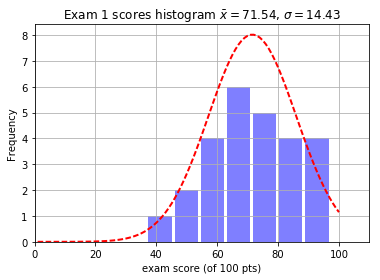

In [12]:
scores1 = data_file['Exam 1 [Total Pts: 100.00000 Score] |517539'][0:(N_students+1)]

std1 = np.std(scores1)
mean1 = np.mean(scores1)

# add a 'best fit' trend curve
weights = np.ones_like(scores1)/len(scores1)
bins = np.linspace(1,100,100)
(mu, sigma) = norm.fit(scores1)

# use the fitting tool from the stats package, but if it doesn't work, 
# use the standard dev and mean to plot a normal distribution...
if not math.isnan(mu):
    y = plt.mlab.normpdf( bins, mu, sigma)
else:
    y = plt.mlab.normpdf( bins, mean1, std1)
    
# plotting:    
plt.plot(bins, y/weights[0]*10, 'r--', linewidth=2) 
scores1.hist(bins=7,normed=0,rwidth = 0.9, color='b',alpha=.5)
plt.xlabel('exam score (of 100 pts)')
plt.ylabel('Frequency')
plt.title(r'Exam 1 scores histogram $\barx=%.2f$, $\sigma=%.2f$'%(mean1,std1))
plt.xlim([0,110])
plt.grid(True)
plt.savefig('testfig.png',dpi=400)
plt.show()

In [119]:
weights[0]**-1

15.0

That's basically it. Can repeat again with other columns if needed...

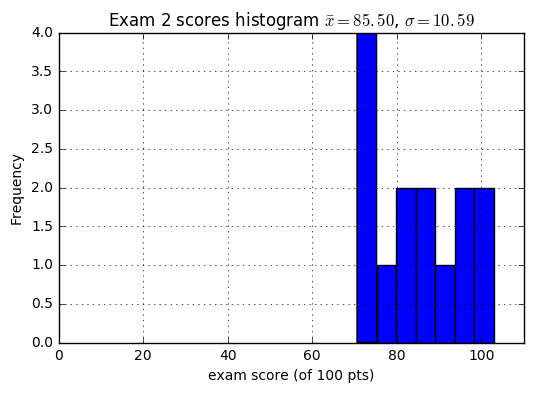

In [120]:
scores2 = data_file['Column7'][1:(N_students-1)]

std2 = np.std(scores2)
mean2 = np.mean(scores2)

# # add a 'best fit' trend curve
# weights = np.ones_like(scores2)/len(scores2)
# bins = np.linspace(1,110,100)
# (mu, sigma) = norm.fit(scores2)
# y = plt.mlab.normpdf( bins, mu, sigma)
# plt.plot(bins, y/weights[0]*10, 'r--', linewidth=2) 

scores2.hist(bins=7)
plt.xlabel('exam score (of 100 pts)')
plt.ylabel('Frequency')
plt.title(r'Exam 2 scores histogram $\barx=%.2f$, $\sigma=%.2f$'%(mean2,std2))
plt.grid(True)
plt.xlim([0,110])
plt.show()

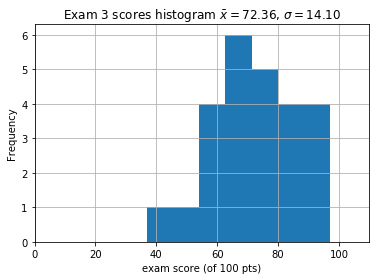

In [36]:
scores3 = data_file['Column9'][1:(N_students+1)]

std3 = np.std(scores3)
mean3 = np.mean(scores3)

# add a 'best fit' trend curve
weights = np.ones_like(scores3)/len(scores3)
bins = np.linspace(1,110,100)
(mu, sigma) = norm.fit(scores3)
y = plt.mlab.normpdf( bins, mu, sigma)
plt.plot(bins, y/weights[0]*10, 'r--', linewidth=2) 

scores3.hist(bins=7)
plt.xlabel('exam score (of 100 pts)')
plt.ylabel('Frequency')
plt.title(r'Exam 3 scores histogram $\barx=%.2f$, $\sigma=%.2f$'%(mean3,std3))
plt.grid(True)
plt.xlim([0,110])
plt.show()

In [122]:
# http://stackoverflow.com/questions/34734940/in-pandas-how-to-get-average-of-several-column-values-for-each-row-in-data-fram

data_file['avg'] = data_file[['Column4','Column7','Column9']][1:(N_students+1)].mean(axis=1)

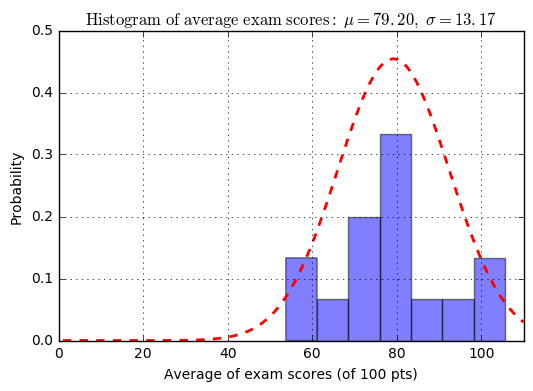

In [123]:
exam_score_avgd = data_file['avg'][1:(N_students+1)]

# create normalized histogram such that probabilities add to 1.
weights = np.ones_like(exam_score_avgd)/len(exam_score_avgd)
exam_score_avgd.hist(bins=7,normed=0,weights=weights,color='b',alpha=.5)
bins = np.linspace(1,110,100)
(mu, sigma) = norm.fit(exam_score_avgd)

# add a 'best fit' trend curve
y = plt.mlab.normpdf( bins, mu, sigma)
plt.plot(bins, y/weights[0], 'r--', linewidth=2)   # *np.max(data_file['avg'][1:(N_students+1)])/10
plt.xlabel('Average of exam scores (of 100 pts)')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ average\ exam\ scores:}\ \mu=%.2f,\ \sigma=%.2f$' %(mu, sigma))
plt.xlim([0,110])
plt.grid(True)
plt.show()

In [56]:
# max(myarray)